# ISYS2407 Information Systems Solutions & Design

# Assignment 3 

# Data Cleaning Task

#### Student name:  Hewa Pattinige Kemith Nanayakkara

#### Student number: S3758840

In [1]:
# Pandas has been imported to perform exploratory data analysis
# Numpy has been imported to allow the proformance of faster mathematical operations
import numpy as np
import pandas as pd

# Library forn saving a python object to file
import joblib 

#Used to assign missing values
from sklearn.impute import SimpleImputer

# Used as it is the main plotting library for python
import matplotlib.pyplot as plt

# This statement is made as it is directional for matplotlib to plot graphs within the notebook
%matplotlib inline 
import seaborn as sns # Seaborn is used to plot graphs and is built on top of matplotlib

## 2 Load data

In [2]:
# As the dataset is large, at the suspicion of missing, values, the below function is used to ensure all data is loaded
# The data is loaded from the CSV file stored locally
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']
employeeattrition_df = pd.read_csv("employeeattrition.csv", na_values=missing_values)

# 3 Fix Data Type

In [3]:
employeeattrition_df.dtypes

age                            int64
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_count                 int64
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over_18_yrs                   object
overtime                      object
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
standard_hours                 int64
stock_option_level             int64
t

# 4.1 Check if there are any Duplicate Rows

In [4]:
#Check if there are any duplcate rows by using the duplicate () function
Dup_Rows = employeeattrition_df[employeeattrition_df.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))



Duplicate Rows : 
 Empty DataFrame
Columns: [age, business_travel, daily_rate, department, distance_from_home, education, education_field, employee_count, employee_number, environment_satisfaction, gender, hourly_rate, job_involvement, job_level, job_role, job_satisfaction, marital_status, monthly_income, monthly_rate, num_companies_worked, over_18_yrs, overtime, percent_salary_hike, performance_rating, relationship_satisfaction, standard_hours, stock_option_level, total_working_years, training_times_last_year, work_life_balance, years_at_company, years_in_current_role, years_since_last_promotion, years_with_curr_manager, attrition]
Index: []

[0 rows x 35 columns]


# 4 Delete duplicate rows (if any)

In [5]:
# No deletion of duplicates is required, because there are no duplicates in the dataframe

# 5 Handle Missing Values

## 5.1 Percentage of missing values encoded as NaN

In [6]:
employeeattrition_df.isnull().sum()

age                           0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over_18_yrs                   0
overtime                      0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at_company              0
years_in

In [7]:
percent_missing = round(employeeattrition_df.isna().mean() * 100, 4)
print(percent_missing)

age                           0.0
business_travel               0.0
daily_rate                    0.0
department                    0.0
distance_from_home            0.0
education                     0.0
education_field               0.0
employee_count                0.0
employee_number               0.0
environment_satisfaction      0.0
gender                        0.0
hourly_rate                   0.0
job_involvement               0.0
job_level                     0.0
job_role                      0.0
job_satisfaction              0.0
marital_status                0.0
monthly_income                0.0
monthly_rate                  0.0
num_companies_worked          0.0
over_18_yrs                   0.0
overtime                      0.0
percent_salary_hike           0.0
performance_rating            0.0
relationship_satisfaction     0.0
standard_hours                0.0
stock_option_level            0.0
total_working_years           0.0
training_times_last_year      0.0
work_life_bala

# 6 Handle outliers

<AxesSubplot:xlabel='monthly_income'>

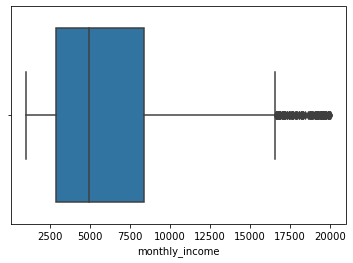

In [8]:
sns.boxplot(x=employeeattrition_df["monthly_income"]) 

<AxesSubplot:xlabel='daily_rate'>

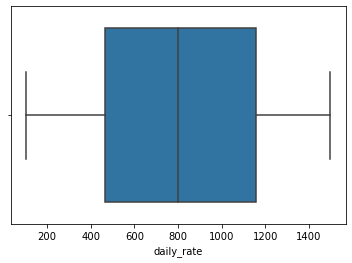

In [9]:
sns.boxplot(x=employeeattrition_df["daily_rate"]) 

<AxesSubplot:xlabel='monthly_rate'>

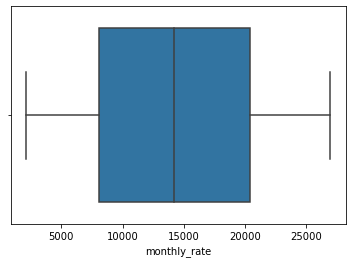

In [10]:
sns.boxplot(x=employeeattrition_df["monthly_rate"]) 

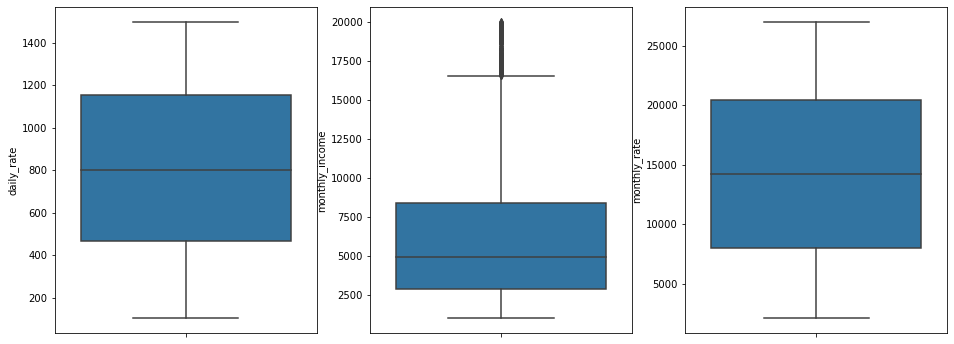

In [11]:
fig, ax = plt.subplots(1,3, figsize=(16,6))  # 1 row and 3 columns


ax1 = sns.boxplot(y=employeeattrition_df["daily_rate"], ax=ax[0])
ax2 = sns.boxplot(y=employeeattrition_df["monthly_income"], ax=ax[1]) 
ax3 = sns.boxplot(y=employeeattrition_df["monthly_rate"], ax=ax[2])

## 6.2 Percentage of outliers

In [12]:
# Print the list of columns
columns = [ 'monthly_income', 'daily_rate','monthly_rate']
print(columns)
print()

for col in columns:
    percentile_25 = employeeattrition_df[col].quantile(0.25)
    percentile_75 = employeeattrition_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    total = len(employeeattrition_df[col])

    # Determine the upper and lower boundaries for outliers
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR those that are greater than the upper boundary
    # returns a list of things
    num_outliers = len(employeeattrition_df[(employeeattrition_df[col] < lower) | (employeeattrition_df[col] > upper)])
    
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()

['monthly_income', 'daily_rate', 'monthly_rate']

col: monthly_income, lower: -5291.0, upper: 16581.0
Num outliers: 114, total rows: 1470, percent: 7.76

col: daily_rate, lower: -573.0, upper: 2195.0
Num outliers: 0, total rows: 1470, percent: 0.0

col: monthly_rate, lower: -10574.75, upper: 39083.25
Num outliers: 0, total rows: 1470, percent: 0.0



## 6.3 Replace outliers with median

In [13]:
# Using Inter Quartile Range (IQR) to detect outliers - for non-normal (non-Gaussian) distributions

# Add the columns below to a list
columns = ['monthly_income', 'daily_rate', 'monthly_rate']

for col in columns:
    median_val = employeeattrition_df[col].quantile(0.5)
    percentile_25 = employeeattrition_df[col].quantile(0.25)
    percentile_75 = employeeattrition_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # Replace all values that are less than the lower boundary OR those that are greater than the upper boundary
    employeeattrition_df[col] = np.where((employeeattrition_df[col] < lower) | (employeeattrition_df[col] > upper), median_val, employeeattrition_df[col])
    employeeattrition_df[col] = employeeattrition_df[col].astype(int)
 
#employees_df.describe()
employeeattrition_df.describe().T  # T means transpose - will transpose rows to column

col: monthly_income, lower: -5291.0, upper: 16581.0,  median_val: 4919.0
col: daily_rate, lower: -573.0, upper: 2195.0,  median_val: 802.0
col: monthly_rate, lower: -10574.75, upper: 39083.25,  median_val: 14235.5


,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
daily_rate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
distance_from_home,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
employee_count,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
employee_number,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
environment_satisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
hourly_rate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
job_involvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
job_level,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [14]:
employeeattrition_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,...,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0


# 7 Column manipulation

## 7.1 Drop Column with certain values

In [15]:
employeeattrition_df.drop(['employee_count', 'employee_number', 'over_18_yrs', 'standard_hours'], axis=1, inplace=True) 
# these values will be removed as they are reduntant to any computations done
employeeattrition_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
daily_rate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
distance_from_home,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
environment_satisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
hourly_rate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
job_involvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
job_level,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
job_satisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
monthly_income,1470.0,5457.491837,3192.257420,1009.0,2911.0,4913.5,6581.00,16555.0


# 8 Rename values

In [16]:
# the values in the fields below were replaced with more categorical names for each rating

employeeattrition_df["job_satisfaction"] = employeeattrition_df["job_satisfaction"].replace({1:"Very Unsatisfied",2:"Unsatisfied", 3:"Satisfied", 4:"Very Satisfied"})

employeeattrition_df["environment_satisfaction"] = employeeattrition_df["environment_satisfaction"].replace({1:"Very Unsatisfied",2:"Unsatisfied", 3:"Satisfied", 4:"Very Satisfied"})

employeeattrition_df["work_life_balance"] = employeeattrition_df["work_life_balance"].replace({1:"Extremely Unbalanced",2:"Unbalanced", 3:"Balanced", 4:"Extremely Balanced"})

employeeattrition_df["relationship_satisfaction"] = employeeattrition_df["relationship_satisfaction"].replace({1:"Very Unsatisfied",2:"Unsatisfied", 3:"Satisfied", 4:"Very Satisfied"})

# Check
employeeattrition_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,Unsatisfied,Female,94,...,Very Unsatisfied,0,8,0,Extremely Unbalanced,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Satisfied,Male,61,...,Very Satisfied,1,10,3,Balanced,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,Very Satisfied,Male,92,...,Unsatisfied,0,7,3,Balanced,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very Satisfied,Female,56,...,Satisfied,0,8,3,Balanced,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,Very Unsatisfied,Male,40,...,Very Satisfied,1,6,3,Balanced,2,2,2,2,0


# 9 View the cleaned data

In [17]:
# Final check on saved data
employeeattrition_df.to_csv('employeeattrition.csv', index=False) 
employeeattrition_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,Unsatisfied,Female,94,...,Very Unsatisfied,0,8,0,Extremely Unbalanced,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Satisfied,Male,61,...,Very Satisfied,1,10,3,Balanced,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,Very Satisfied,Male,92,...,Unsatisfied,0,7,3,Balanced,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very Satisfied,Female,56,...,Satisfied,0,8,3,Balanced,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,Very Unsatisfied,Male,40,...,Very Satisfied,1,6,3,Balanced,2,2,2,2,0


# 11 Pickle the cleaned data

### For use later in another Jupyter Notebook for Machine Learning

In [18]:
# Saving dataframe as pickle file
joblib.dump(employeeattrition_df, 'employeeattrition.pkl') 

['employeeattrition.pkl']